# Semana 3 Codenation - Análise Exploratória dos Dados

Este notebook foi feito com base nas aulas do Túlio Nogueira do programa AceleraDev DataScience da Codenation

Dados: https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Este dataset possui 6079 casas para alugar com 13 classes diferentes no Brasil.

### Colunas

**id**

**city**: Cidade onde o imóvel está localizada 

**area**: Área do imovel 

**rooms**: Número de quartos

**bathroom**: Número de banheiros 

**parking spaces**: Numero de vagas de estacionamento

**floor**: Andar

**animal**: Aceita animais? 

**furniture**: Mobilhada? 

**hoa**: Valor do condomínio

**rent amount**: Valor do Aluguel 

**property tax**: IPTU 

**fire insurance**: Seguro Incêndio

**total**: Valor total 

Antes de mais nada analisa-se quais variáveis se tem e qual a sua relação com o problema a ser resolvido.

* O valor do aluguel tem relação com a mobilia?

* A cidade de localização é em que país?

* O valor do aluguel está em dólares, reais, euros?

* Quais características da região de localização influenciam nos valores de aluguéis ou condomínio?

Esses são exemplos de alguns questionamentos

## Importando os pacotes

Normalmente em problemas reais a importação consiste na utilização de separadores e delimitadores para leitura de um arquivo. Aqui como utilizamos o Kaggle simplesmente fazemos a leitura. A base de dadas já foi tratada anteriormente

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


* Área: provavelmente em m²

* Moeda: Real(R$)

In [4]:
#Verificando os tipos das variáveis
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
#Verificando o preenchimento(Há nulos ou não)
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

* Todos os valores estão preenchidos, logo não preciso inputar dados (Tratar esses dados)

In [6]:
#Através do info() tenho uma maior visibilidade dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


## Problema: Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

* Consiste em explorar as relações de valor do aluguel analisando apenas uma variável.

In [7]:
#Verifica quantas variáveis eu tenho de qual tipo
df.dtypes.value_counts()

int64     9
object    4
dtype: int64

In [8]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


**Primeiro passo:** entender como funciona o valor de alguel realmente

In [9]:
#Renomeando a coluna para ficar mais simples a procura
df.rename(columns = { 'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [10]:
#Coluna renomeada
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [11]:
#Média
df['valor_aluguel'].mean()

3896.247194163861

A média do valor dos aluguéis desse dataset é R$3896.247194163861

In [12]:
#Mediana
df['valor_aluguel'].median()

2661.0

A média é muito maior que a mediana indica que eu tenho *outliers* nos meus dados. Eu tenho alguns valores de alguel que estão tornando essa média muito alta.

Então se eu quiser trabalhar com valores centralizados. A mediana seria menos sensitiva a esses *outliers*.

In [13]:
#Desvio padrão
df['valor_aluguel'].std()

3408.5455176710816

O desvio padrão é muito alto, quase o valor da média. O que indica que a dispersão dos valores de alguel é muito alta.

In [14]:
#Estatística descritiva
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

**Conclusões sobre a estatística Descritiva:**
* O valor mínimo de aluguel é R$ 450,00.

* Cerca de 75% desses dados são na faixa de R$5000.

* Tenho um *outlier* de um valor de aluguel de R$45000,00.

* Acima de 75% os dados de valores de aluguel cresceram em 9 vezes. Quem são esses valores (quartis de valores muito altos)?

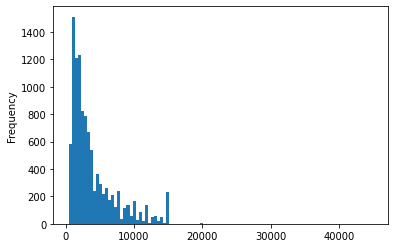

In [15]:
df['valor_aluguel'].plot(kind='hist', bins=100)
#Bins: facilita a visualização de quebras dos dados

O histograma consegue nos fazer visualizar esses dados de uma melhor forma.

**Conclusões observando o histograma**: Tenho uma concentração(frequency) muito grande de valores de aluguéis com valores baixos. Cerca de 75% desses valores de aluguéis são menores ou iguais a 5000 reais e uma pequena parcela é acima desse valor. Ou seja, 8019 de um total de 10692 imóveis, possuem valores entre 450 e 5000 reais.


In [16]:
#Skewness: positivo skew
df.valor_aluguel.skew()

1.8388773035440982

In [17]:
#Curtose: leptcúrtica(>0)
df.valor_aluguel.kurtosis()

4.624228179818687

## Exploração multivariáveis

### Perguntas

- Qual a cidade com a média de aluguel mais alta?
- Quantos banheiros existem nas residências com aluguéis mais altos?
- Os imóveis mais caros aceitam animal?
- Os imóveis mais caros são mobiliados?

In [18]:
#Qual a cidade com a média de aluguel mais alta?
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [19]:
#Quantos banheiros existem em média nas residências com aluguéis mais altos?
## definição de aluguéis mais altos: valores acima de 5000

df['aluguel_alto']=['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]

In [20]:
df.aluguel_alto.value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

Aproximadamente 2500 imóveis com aluguel alto

De acordo com a definição criada um aluguel Alto possui em média 4 banheiros e um aluguel baixo posssui em média 2 banheiros.

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quantos mais banheiros em um imóvel maior o valor de um aluguel.
- Os imóveis com mobília tem o aluguel mais alto.

Devo pensar em informações que não constam na base de dados mas facilitam a resposta de perguntas.

As hipóteses muitas vezes estão relacionadas com o senso comum.

Converter perguntas e hipóteses para uma análise estatística

In [21]:
#corr() sem método default é person
df[['valor_aluguel', 'bathroom']].corr()

,valor_aluguel,bathroom
valor_aluguel,1.000000,0.668504
bathroom,0.668504,1.000000


In [22]:
#Correlação de Spearman
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


- Alta correlação entre o valor do aluguem e do número de banheiros.

In [23]:
aux = pd.DataFrame( {'colunas': df.columns, 'tipos': df.dtypes})

In [24]:
#Filtro de colunas numéricas
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [25]:
#Correlacionando as variáveis inteiras com o valor do aluguel
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method= 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

## Visualização de dados

In [26]:
import seaborn as sns

In [27]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

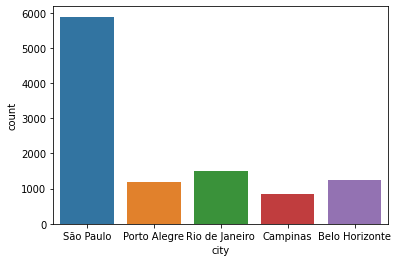

In [28]:
#Gráfico de barras
sns.countplot(x = 'city', data = df)

In [29]:
import matplotlib.pyplot as plt

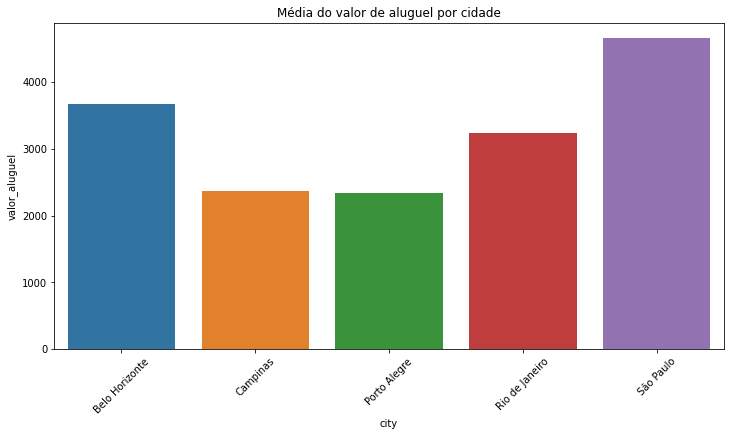

In [30]:
#Visualização da média dos valores de aluguéis
#Muda o Tamanho do gráfico
plt.figure(figsize=(12,6))

sns.barplot(x='city', y='valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())

#Colocando título
plt.title('Média do valor de aluguel por cidade')
plt.xticks(rotation = 45)
plt.show()

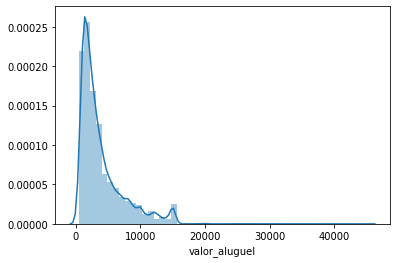

In [31]:
#Histograma 
sns.distplot(df['valor_aluguel'])

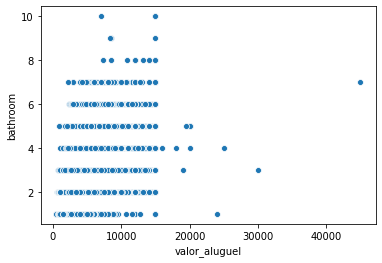

In [32]:
sns.scatterplot(x='valor_aluguel', y='bathroom', data=df)

In [33]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)', 'aluguel_alto'],
      dtype='object')

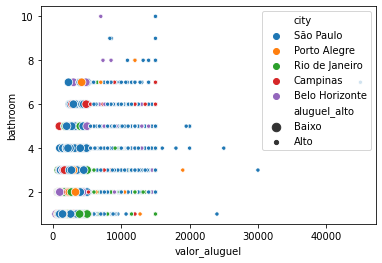

In [34]:
#Essa visualização não é boa para a visualização desse tipo de dados
sns.scatterplot(x='valor_aluguel', y='bathroom',hue = 'city',size ='aluguel_alto', data=df)

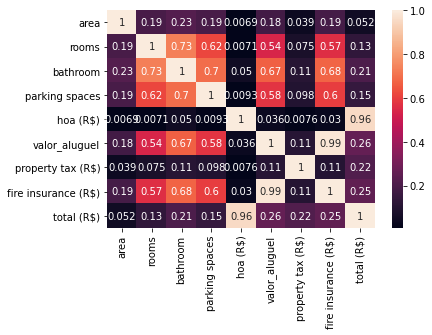

In [35]:
#Plota a matriz de correlação
#annot = True. Correlaciona todas as variáveis numéricas
sns.heatmap(df.corr(), annot = True)

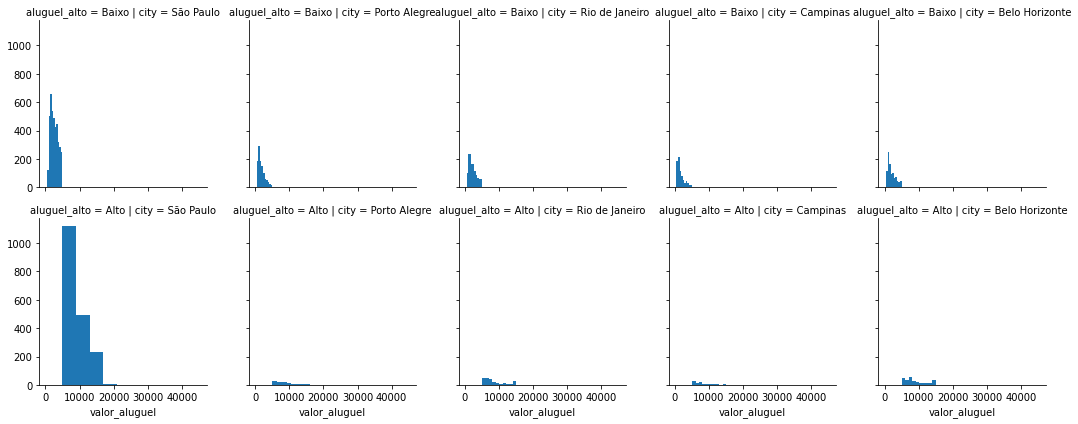

In [36]:
#
g = sns.FacetGrid(df, col="city",  row="aluguel_alto")
g = g.map(plt.hist, "valor_aluguel")